In [1]:
!pip install imbalanced-learn

In [2]:
import pandas as pd
import datetime as dt
import pandas_profiling

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced
from sklearn.metrics import confusion_matrix

In [3]:
def classification(x,y):
    
    
    g=GaussianNB()
    b=BernoulliNB()
    k=KNeighborsClassifier()
    svc=SVC()
    d=DecisionTreeClassifier()
    log=LogisticRegression()
    gbc=GradientBoostingClassifier()
    mn=MultinomialNB()
    rf=RandomForestClassifier()
    ab=AdaBoostClassifier()
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
    
    algos=[g,b,k,svc,d,log,gbc,mn,rf,ab]
    algos_name=['Gaussian','Bernoulli','KNeigbors','SVC','DecisionTree','LogisticRegr','GradientBoosting','Multinominal','RandomForest','AdaBoost']
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
   
    result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)
    
    for i in algos:
        
        ru=RandomUnderSampler(random_state=42)
        
        x_ru,y_ru=ru.fit_sample(x_train,y_train)
        
        predict=i.fit(x_ru,y_ru).predict(x_test)
        
        accuracy.append(accuracy_score(y_test,predict))
        precision.append(precision_score(y_test,predict))
        recall.append(recall_score(y_test,predict))
        f1.append(f1_score(y_test,predict))
        

    
    
    result.AccuracyScore=accuracy
    result.PrecisionScore=precision
    result.RecallScore=recall
    result.f1_Score=f1
    
    
    return result.sort_values('AccuracyScore',ascending=False)

In [4]:
df = pd.read_csv("failure.csv")

In [5]:
df.head(2)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [7]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [8]:
df.duplicated().sum()#duplicated:mükerrer

0

In [9]:
df.tail()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0
124493,2015-11-02,Z1F0QLC1,0,17572840,0,0,0,10,351431,0,0,0


In [10]:
df.sample(3)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
107389,2015-07-28,S1F0FP0C,0,188278504,0,0,0,10,287596,0,0,0
14178,2015-01-16,W1F1D8GZ,0,203207240,0,0,0,10,425592,0,0,0
90718,2015-06-09,W1F11ZG9,0,242460224,0,9,215,3,341154,0,0,1


In [11]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [12]:
df

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


### FEATURE ENGINEERING & DATA VISUALIZATIONS

In [13]:
#seperate the date 
df['date']=pd.to_datetime(df['date'])

In [14]:
df['day']=df['date'].dt.day

In [15]:
df['month']=df['date'].dt.month

In [16]:
df['year']=df['date'].dt.year

In [17]:
df=df.drop('date',axis=1)
# del df["date"]

In [18]:
df.head()

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,day,month,year
0,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,1,1,2015
1,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,1,1,2015
2,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,1,1,2015
3,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,1,1,2015
4,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,1,1,2015


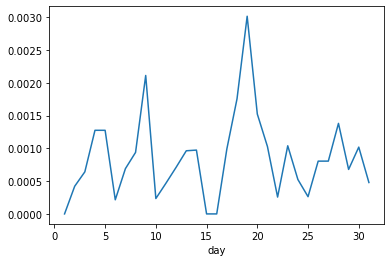

In [19]:
df.groupby('day')['failure'].mean().plot();

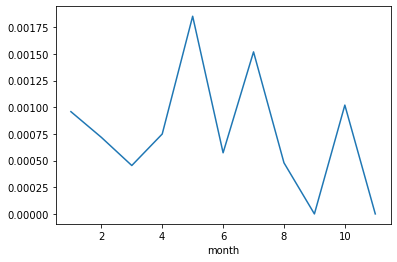

In [20]:
df.groupby('month')['failure'].mean().plot();

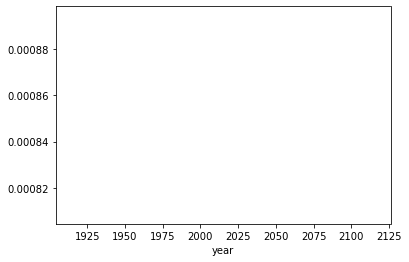

In [21]:
df.groupby('year')['failure'].mean().plot();

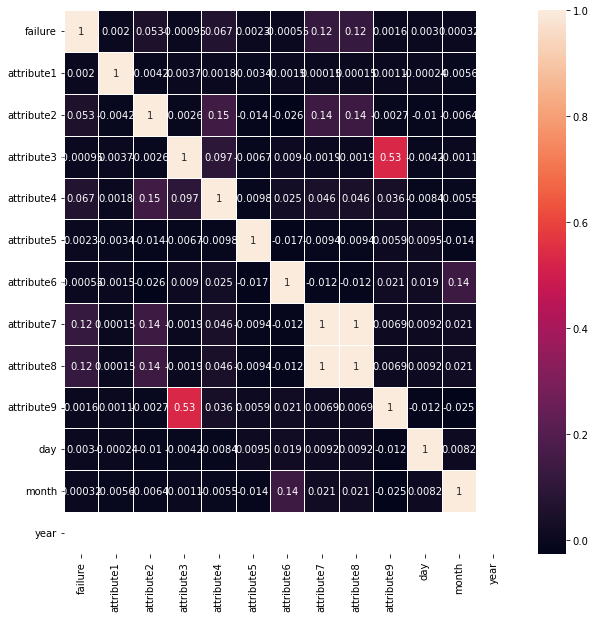

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
corr = df[df.columns].corr()
sns.heatmap(corr, annot=True, linewidth=.5);

In [23]:
df.corr()['failure'].sort_values(ascending=False)

failure       1.000000
attribute7    0.119055
attribute8    0.119055
attribute4    0.067398
attribute2    0.052902
day           0.002994
attribute5    0.002270
attribute1    0.001984
attribute9    0.001622
month         0.000321
attribute6   -0.000550
attribute3   -0.000948
year               NaN
Name: failure, dtype: float64

In [24]:
del df["attribute7"]

In [25]:
df.device.sample(10)

31204     W1F13SJ7
34951     Z1F0QZJB
26902     W1F0X6SQ
41317     S1F0T1BB
90365     W1F111N7
31743     S1F13H80
95920     W1F0JXDL
95019     Z1F0Q8RT
121871    W1F05X69
5313      W1F0SNW3
Name: device, dtype: object

In [26]:
df["device"] = df.device.str[:3]
#df['device']=[i[:3] for i in df.device.values.tolist()]

In [27]:
df.sample(6)

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute8,attribute9,day,month,year
2038,W1F,0,233441744,0,0,2,10,7489,0,0,2,1,2015
42759,S1F,0,173394064,4960,0,0,13,89385,0,0,26,2,2015
35184,S1F,0,187515096,0,0,0,6,272032,0,0,15,2,2015
83189,S1F,0,32558504,0,1331,0,13,223359,0,34,19,5,2015
14620,S1F,0,175059824,0,0,0,8,206366,0,0,17,1,2015
28194,S1F,0,237639672,0,0,0,9,220586,0,0,5,2,2015


In [28]:
df.device.sample(10)

101589    Z1F
78209     S1F
51837     Z1F
111767    S1F
124130    Z1F
19179     W1F
111876    W1F
73543     S1F
114562    S1F
114405    W1F
Name: device, dtype: object

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   device      124494 non-null  object
 1   failure     124494 non-null  int64 
 2   attribute1  124494 non-null  int64 
 3   attribute2  124494 non-null  int64 
 4   attribute3  124494 non-null  int64 
 5   attribute4  124494 non-null  int64 
 6   attribute5  124494 non-null  int64 
 7   attribute6  124494 non-null  int64 
 8   attribute8  124494 non-null  int64 
 9   attribute9  124494 non-null  int64 
 10  day         124494 non-null  int64 
 11  month       124494 non-null  int64 
 12  year        124494 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 12.3+ MB


In [30]:
df.device.value_counts()

S1F    54858
W1F    43268
Z1F    26368
Name: device, dtype: int64

In [31]:
df.quantile(.97).astype('int')

failure               0
attribute1    236800423
attribute2          392
attribute3            9
attribute4            6
attribute5           65
attribute6       477062
attribute8            0
attribute9           24
day                  30
month                 9
year               2015
Name: 0.97, dtype: int32

In [32]:
outliers=df.quantile(.97)
df=df[(df['attribute1']<outliers['attribute1'])]
df=df[(df['attribute2']<outliers['attribute2'])]
df=df[(df['attribute6']<outliers['attribute6'])]

### CLASSIFICATION

In [33]:
x=df.drop('failure',axis=1)
y=df['failure']

In [34]:
x=pd.get_dummies(x,drop_first=True)

In [50]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced
from sklearn.metrics import confusion_matrix

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=13)
gbc=GradientBoostingClassifier()

In [53]:
rus=RandomUnderSampler(random_state=13)
x_rus,y_rus=rus.fit_resample(x_train,y_train)
pred=gbc.fit(x_rus,y_rus).predict(x_test)

In [54]:
confusion_matrix(y_test,pred)

array([[21545,  6818],
       [    3,     8]], dtype=int64)

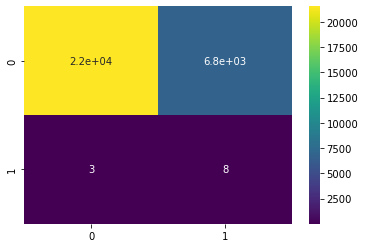

In [55]:
sns.heatmap(confusion_matrix(y_test,pred), cmap='viridis', annot=True);

In [56]:
classification(x,y)

AttributeError: 'RandomUnderSampler' object has no attribute 'fit_sample'